In [1]:
import scanpy as sc
import sys
sys.path.append('/wsfish/glioblastoma/')
import FISHspace as sp
from scipy.spatial import KDTree
import numpy as np
import squidpy as sq
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
import pickle
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

# make font changeable in Illustrator
mpl.rcParams['pdf.fonttype'] = 42

# save figure with no pad
mpl.rcParams['savefig.pad_inches'] = 0
mpl.rcParams['savefig.bbox'] = 'tight'

# set axes width
mpl.rcParams['axes.linewidth'] = 0.2
mpl.rcParams['xtick.minor.pad'] = 0
mpl.rcParams['xtick.major.pad'] = 0
mpl.rcParams['ytick.minor.pad'] = 0
mpl.rcParams['ytick.major.pad'] = 0
mpl.rcParams['xtick.minor.width'] = 0.2
mpl.rcParams['xtick.major.width'] = 0.2
mpl.rcParams['ytick.minor.width'] = 0.2
mpl.rcParams['ytick.major.width'] = 0.2

# use colorblind seaborn style
plt.style.use('seaborn-colorblind')

%load_ext autoreload
%autoreload 2

2023-08-29 18:44:05.713316: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
dics = pickle.load(open('NN_Enrichment2.pkl','rb'))

In [4]:
dics['SL001A'].index

Index(['AC-like 1', 'AC-like 2', 'AC-like 3', 'AC-like 4', 'AC-like 5',
       'AC-like 6', 'AC-like 7', 'preOPC-like 1', 'GW-like 1', 'GW-like 2',
       'GW-like 3', 'GW-like 4', 'GW-like 5', 'GW-like 6', 'GW-like 7',
       'GW-like 8', 'nIPC-like 1', 'nIPC-like 2', 'nIPC-like 3', 'RG-like',
       'nIPC-RG-like', 'OPC-like 1', 'OPC-like 2', 'Endothelial', 'Mural',
       'FB-like 2', 'FB-like 3', 'Mono 1', 'Mono 2', 'TAM-BDM 3', 'TAM-BDM 4',
       'TAM-MG', 'DC'],
      dtype='object')

In [5]:
palette = {
    'GW-like 2': '#EDE8F3',
    'GW-like 3': '#E2D8EA',
    'GW-like 1': '#D6BEDD',
    'GW-like 5': '#CFA8D1',
    'GW-like 7': '#e43c96',
    'GW-like 8': '#C50F53',
    'GW-like 4': '#A40447',
    'GW-like 6': '#840034',

    #'Endothelial':'#d5b8ff', #mauve
    'Mural': '#8c14fc',  #electric indigo


}

In [6]:
samples = list(dics.keys())
noGW = ['SL040C', 'SL001A', 'SL001B', 'SL057B', 'SL061C', 'SL018', 'SL015', 'SL040F', 'SL027B','SL053', 'SL002', 'SL012', 'SL003' ]
GW = [s for s in samples if s not in noGW]


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:name pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 25 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'G', 'M', 'W', 'a', 'e', 'eight', 'five', 'four', 'hyphen', 'i', 'k', 'l', 'minus', 'nonmarkingreturn', 'one', 'r', 'seven', 'six', 'space', 'three', 'two', 'u', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 16, 19, 20, 21, 22, 23, 24, 25, 26, 27, 42, 48, 58, 68, 72, 76, 78, 79, 85, 88, 3228]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 25 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'G', 'M', 'W', 'a', 'e', 'eight', 'fi

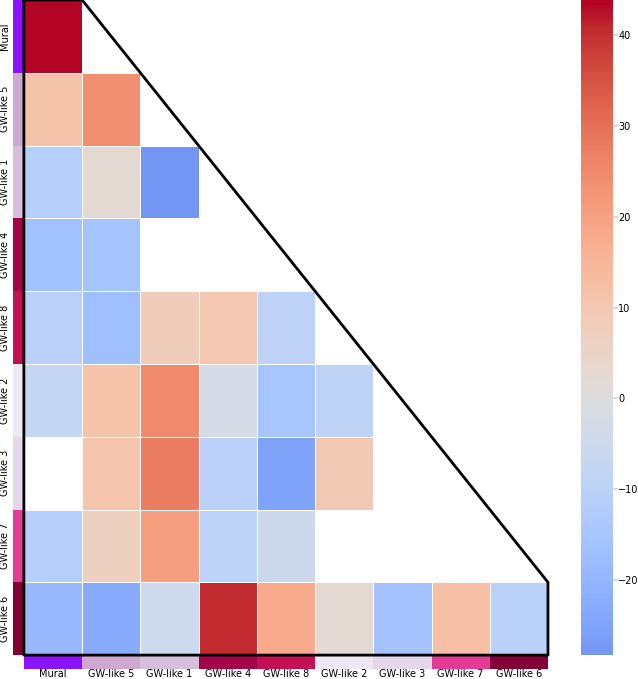

Index(['Mural', 'GW-like 5', 'GW-like 1', 'GW-like 4', 'GW-like 8',
       'GW-like 2', 'GW-like 3', 'GW-like 7', 'GW-like 6'],
      dtype='object')

In [7]:

from sklearn.preprocessing import StandardScaler
classes0 = list(palette.keys())
classes0 = np.array(classes0)
classes = []
for s in dics:
    classes += dics[s].index.tolist()
classes = np.unique(np.array(classes))
classes = classes0[np.isin(classes0, classes)]
df0 = dics[list(dics.keys())[0]]
df0 = df0.loc[classes][classes]
vals = np.zeros_like(df0.values)

for x in GW:
    df = dics[x]    
    df = df.loc[classes][classes]
    X = StandardScaler().fit_transform(df.values)
    X = StandardScaler().fit_transform(X.T).T
    vals += X

NN_GW = pd.DataFrame(data=vals, columns=classes, index = classes)

sp.pl.neighborhood_enrichment_from_pandas(
    NN_GW,
    palette=palette,
    save=True,
    #order_cols=order,
    #order_rows=order,
    figsize=(7,7),
    savepath=f'figures/NN_GW.pdf',
    
)

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:name pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 23 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'G', 'M', 'W', 'a', 'e', 'eight', 'five', 'four', 'hyphen', 'i', 'k', 'l', 'nonmarkingreturn', 'one', 'r', 'seven', 'six', 'space', 'three', 'two', 'u']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 16, 20, 21, 22, 23, 24, 25, 26, 27, 42, 48, 58, 68, 72, 76, 78, 79, 85, 88]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 23 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'G', 'M', 'W', 'a', 'e', 'eight', 'five', 'four', 'hyphen', 'i',

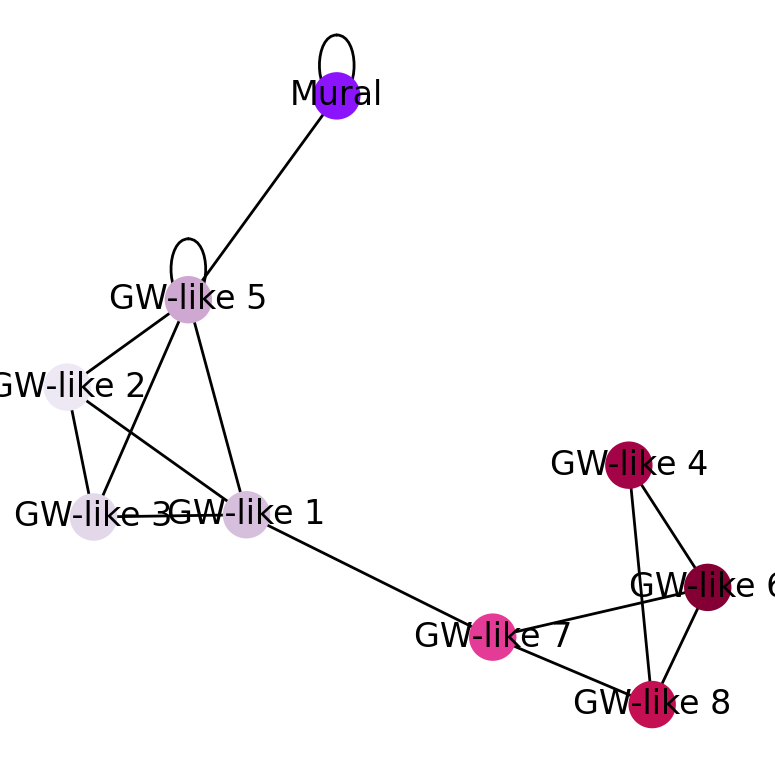

In [10]:
import networkx as nx
df = NN_GW
df = df.melt(ignore_index=False)
df = df[df.value>8]
df['X'] = df.index
df['Y'] = df.variable
# Transform it in a links data frame (3 columns only):
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
G=nx.from_pandas_edgelist(df, 'X', 'Y')


# Plot the network:
nx.draw_networkx(
    G, 
    with_labels=True,
    node_color=[palette[n] for n in G.nodes()], 
    node_size=200, 
    edge_color='black',
    font_family='arial',
    linewidths=20, 
    font_size=24,
    width=2,
    pos=nx.spring_layout(G,k=.9)
)
plt.axis('off')
plt.show()